In [1]:
%load_ext autoreload 

# automatically reload packages imported with %aimport <package>
%autoreload 1 
%aimport src

In [2]:
cd ..

/mnt/storage/mmars/podcast-dataset


In [3]:
import os
import pickle 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.data import load_metadata, find_paths

import src.utils
src.utils.gpu_setup()

from omegaconf import OmegaConf
conf = OmegaConf.load("./config.yaml")

4 actual GPUs, 1 in use.


# Feature extraction demo

Below you can find examples for extracting features using the different feature extractors in the package

## Configuring input paths

In [4]:
metadata = load_metadata(conf.dataset_path)
subset = metadata.iloc[:2]

In [5]:
audio_directory = os.path.join(conf.dataset_path, "podcasts-audio")
audio_paths = find_paths(subset, audio_directory, ".ogg")

## eGeMAPS

The eGeMAPS features can be extracted using the OpenSmile package. Below you can find an example of this. For another example or creating the features for large datasets look at "__src/features/create_opensmile_features.py__"

In [6]:
from src.features.OpenSmileExtractor import OpenSmileExtractor

In [7]:
output_paths = find_paths(subset, "./notebooks/test_results/eGeMaps/", ".h5")

In [8]:
ex = OpenSmileExtractor()

In [9]:
ex.extract(audio_paths, output_paths, num_workers=1)

100%|██████████| 2/2 [00:34<00:00, 20.31s/it]

In [10]:
test_output = pd.read_hdf(output_paths[0])
test_output.head()

100%|██████████| 2/2 [00:34<00:00, 17.32s/it]


,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
time (s),,,,,,,,,,,,,,,,,,,,,
0.00,14.980252,0.164999,12.478530,14.383453,16.756065,4.277535,113.373398,28.009075,-16.222733,106.673019,...,-0.072074,-0.016952,0.613909,5.208333,4.166667,0.0425,0.022776,0.1775,0.117766,-26.653774
0.48,14.568699,0.122981,12.739090,14.312546,16.262573,3.523483,190.686447,93.175095,112.389160,56.656677,...,-0.079065,-0.015573,0.813931,6.250000,4.166667,0.0550,0.025981,0.1280,0.091739,-24.583828
0.96,15.219687,0.332967,12.149195,14.312546,16.328596,4.179401,320.533661,168.895844,117.873878,44.024380,...,-0.083970,-0.004822,0.888226,8.333334,5.208333,0.0600,0.031623,0.1425,0.056292,-23.906471
1.44,35.116810,0.334329,17.715223,41.543777,41.648491,23.933268,347.030121,243.559845,51.579926,36.412964,...,-0.088274,-0.002470,0.935528,2.083333,2.083333,0.3200,0.210000,0.1400,0.060000,-13.505047
1.92,40.793335,0.050241,40.204323,41.552383,41.740482,1.536160,13.953377,7.437013,31.031654,0.000000,...,-0.063376,0.021280,4.013304,5.208333,2.083333,0.4500,0.180000,0.0300,0.000000,-9.862471


## VGGish

The VVGish feature embeddings use a fairly similar approach to YAMNET. While the feature are not calculated for this feature set, you can calculate them  yourself as follows or using the script "__src/features/create_vvgish_features.py__"

setting up the environment and setting the output paths

In [11]:
from src.features.VGGishExtractor import VGGishExtractor

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
preprocess_path = find_paths(subset, "./notebooks/test_results/vvgish/preprocess/", ".pkl")
embed_path = find_paths(subset, "./notebooks/test_results/vvgish/embed/", ".pkl")
postprocess_path = find_paths(subset, "./notebooks/test_results/vvgish/postprocess/", ".pkl")

In [13]:
ex = VGGishExtractor()

### Pre-processing

Turning raw audio features into logartihmic Mel spectrograms

In [14]:
ex.pre_processing(audio_paths, preprocess_path, num_workers=1)

100%|██████████| 2/2 [00:32<00:00, 16.34s/it]

100%|██████████| 2/2 [00:32<00:00, 16.47s/it]


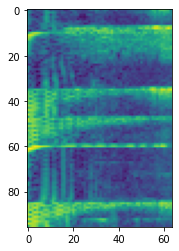

In [15]:
pre_processed = pickle.load(open(preprocess_path[0], "rb"))
plt.imshow(pre_processed[0])

## Embedding

Turning the logarithmic Mel spectorgrams into 128 values embedding vectors

In [16]:
ex.embedding(preprocess_path, embed_path) # embedding is parallelised on the gpu so no num_workers

/home/mmars/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/mmars/.local/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:329: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '


INFO:tensorflow:Restoring parameters from ./data/vggish_model.ckpt


100%|██████████| 2/2 [01:18<00:00, 39.33s/it]


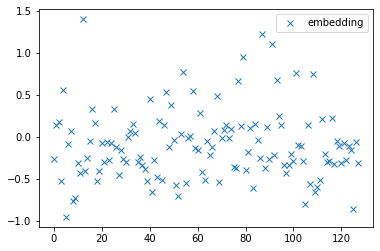

In [17]:
embedding = pickle.load(open(embed_path[0], "rb"))
plt.plot(embedding[0], 'x', label='embedding')
plt.legend()

### Post-processing

Post processing the data using a PCA based on the YouTube 8M dataset

In [18]:
ex.post_processing(embed_path, postprocess_path, num_workers=1)

 50%|█████     | 1/2 [00:00<00:00,  8.01it/s]

100%|██████████| 2/2 [00:00<00:00,  7.38it/s]


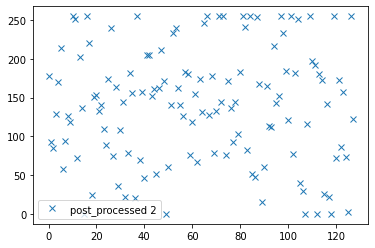

In [19]:
post_processed = pickle.load(open(postprocess_path[0], "rb"))
plt.plot(post_processed[0], 'x', label='post_processed 2')
plt.legend()

## YAMNet

The YAMNET features can be extracted using the code below or using the code from "__src/features/create_yamnet_features.py__".

Note that VGGish uses TF-1.x and YAMNET uses TF-2.x so they cannot be used in the same script (using the same tensorflow import)

In [6]:
from src.features.YAMNetExtractor import YAMNetExtractor

In [7]:
embed_paths = find_paths(subset, "./notebooks/test_results/yamnet/embed", ".h5")
output_paths = find_paths(subset, "./notebooks/test_results/yamnet/scores", ".h5")

In [8]:
ex = YAMNetExtractor()

In [9]:
ex.embedding(audio_paths, output_paths, embed_paths) # also save embeddings

  0%|          | 0/2 [00:00<?, ?it/s]/home/mmars/.local/lib/python3.8/site-packages/pandas/io/pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->axis0] [items->None]

  f(store)
/home/mmars/.local/lib/python3.8/site-packages/pandas/io/pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->block0_items] [items->None]

  f(store)
100%|██████████| 2/2 [00:27<00:00, 13.66s/it]


In [10]:
yamnet_embedding = pd.read_hdf(embed_paths[0])
yamnet_scores = pd.read_hdf(output_paths[0])

Text(0.5, 1.0, '1024 embedding vector')

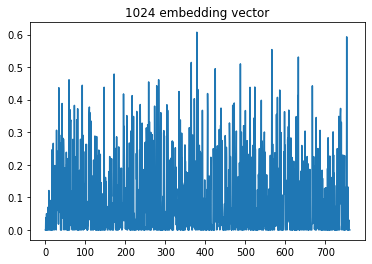

In [11]:
plt.plot(yamnet_embedding[0])
plt.title("1024 embedding vector")

Text(0.5, 1.0, '521 score vector')

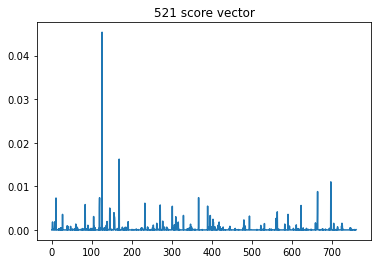

In [14]:
plt.plot(yamnet_scores["Laughter"])
plt.title("521 score vector")